<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

from ydata_profiling import ProfileReport

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder

random.seed(42)
np.random.seed(42)

> Важный дисклеймер — все библиотеки (`ydata_profiling`) я скачал локально.  
> ```  
> !pip install ...  
> ```  
> не оставлял.  

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответьте на вопрос: для чего фиксируем сиды в домашках?

> Мы фиксируем сиды для одинаковой воспроизводимости результатов.  
>
> Без фиксации генераторы случайных чисел каждый запуск будут давать разные:  
> - случайные сплиты  
> - случайные значения при инициализации моделей  
> - и т. д.  
>
> Из-за этого результаты ноутбука не будут совпадать при повторных запусках, и их нельзя будет корректно проверить.  

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [x] Отобразите 30 случайных строк тренировочного датасета.
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [x] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [x] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [x] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [3]:
print(f"30 случайных строк тренировочного датасета:")
df_train.sample(30, random_state=42)

30 случайных строк тренировочного датасета:


name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [4]:
print(f"Первые 5 объектов тестового датасета:")
df_test.head()

Первые 5 объектов тестового датасета:


name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [5]:
print(f"Последние 5 объектов тестового датасета:")
df_test.tail()

Последние 5 объектов тестового датасета:


name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [6]:
print(f"Пропуски:")
df_train.isna().sum()

Пропуски:


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [7]:
print(f"Пропуски (колонки):")
cols_with_nan = df_train.columns[df_train.isna().sum() > 0].tolist()
cols_with_nan

Пропуски (колонки):


['mileage', 'engine', 'max_power', 'torque', 'seats']

In [8]:
print(f"Кол-во дубликатов: {df_train.duplicated().sum()}")

Кол-во дубликатов: 985


> **Выводы:**  
>
> 1. *Какие выводы можно сделать по случайным/верхним/нижним строкам?*  
>     - Можно:  
>        - понять структуру данных  
>        - увидеть примерные диапазоны значений  
>     - Нельзя:  
>        - делать статистические выводы о распределениях  
>        - делать выводы о корреляциях или зависимости целевой переменной  
>        - много чего `:)`  
> 2. *Достаточно ли метода `duplicated()` для анализа дубликатов?*  
>     - Нет. Т.к. он ищет только полные дубликаты по всем колонкам. Но в реальных данных часто бывают частичные дубликаты — например, важные признаки (модель, пробег) совпадают, а формат цены или какие-нибудб мелкие поля — нет.  

In [9]:
profile = ProfileReport(df_train, title="Car Dataset Profile Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 49.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [10]:
print(f"Пропуски train:")
df_train.isna().sum()

Пропуски train:


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [11]:
print(f"Пропуски test:")
df_test.isna().sum()

Пропуски test:


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [12]:
median_values = df_train.median(numeric_only=True)
median_values

year               2015.0
selling_price    450000.0
km_driven         60000.0
seats                 5.0
dtype: float64

In [13]:
df_train = df_train.fillna(median_values)
df_test = df_test.fillna(median_values)

In [14]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(np.int64(803), np.int64(76))

> Проблема!  
>
> Эти признаки текстовые... Я написал парсер для них (перевод в числа):  

In [15]:
df_train["mileage"] = df_train["mileage"].str.replace(" kmpl", "").str.replace(" km/kg", "").astype(float)
df_test["mileage"] = df_test["mileage"].str.replace(" kmpl", "").str.replace(" km/kg", "").astype(float)

In [16]:
df_train["engine"] = df_train["engine"].str.replace(" CC", "").astype(float)
df_test["engine"] = df_test["engine"].str.replace(" CC", "").astype(float)

In [17]:
df_train["max_power"] = df_train["max_power"].str.replace(" bhp", "")
df_test["max_power"] = df_test["max_power"].str.replace(" bhp", "")

df_train["max_power"] = pd.to_numeric(df_train["max_power"], errors="coerce")
df_test["max_power"] = pd.to_numeric(df_test["max_power"], errors="coerce")

> Далее, как я понимаю, от `torque` придётся избавляться. Так что берём первую цифру встреченную в строке (последнее спросил у ChatGPT, он посоветовал именно это + написать регулярку):

In [18]:
df_train["torque"] = df_train["torque"].str.extract(r"(\d+\.?\d*)").astype(float)
df_test["torque"] = df_test["torque"].str.extract(r"(\d+\.?\d*)").astype(float)

> Заполняем:  

In [19]:
print(f"Пропуски train:")
df_train.isna().sum()

Пропуски train:


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        197
torque           203
seats              0
dtype: int64

In [20]:
print(f"Пропуски test:")
df_test.isna().sum()

Пропуски test:


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats             0
dtype: int64

In [21]:
median_values = df_train.median(numeric_only=True)
median_values

year               2015.0
selling_price    450000.0
km_driven         60000.0
mileage              19.3
engine             1248.0
max_power            82.0
torque              160.0
seats                 5.0
dtype: float64

In [22]:
df_train = df_train.fillna(median_values)
df_test = df_test.fillna(median_values)

In [23]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(np.int64(0), np.int64(0))

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [24]:
feature_cols = df_train.columns.drop("selling_price")
partial_duplicates = df_train.duplicated(subset=feature_cols, keep=False)
print(f"Частичные дубли кол-во: {partial_duplicates.sum()}")

Частичные дубли кол-во: 1799


In [25]:
print(f"Частичные дубли:")
df_train[partial_duplicates].sort_values(by=feature_cols.tolist()).head(10)

Частичные дубли:


name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
4485            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   

        fuel seller_type transmission        owner  mileage  engine  \
1703  Diesel      Dealer    Automatic  First Owner    15.73  1968.0   
6307  Diesel      Dealer    Automatic  First Owner    15.73  1968.0   
1836  Diesel  Individual    Automatic  First Owner    13.22  2967.0   
6704  Diesel  Individual    Automatic  First Owner    13.22  2967.0   
117   Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
1337  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
1595  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
2787  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
4485  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
6640  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   

      max_power  torque  seats  
1703     174.33   380.0    5.0  
6307     174.33   380.0    5.0  
1836     241.40   580.0    5.0  
6704     241.40   580.0    5.0  
117      188.00   400.0    5.0  
1337     188.00   400.0    5.0  
1595     188.00   400.0    5.0  
2787     188.00   400.0    5.0  
4485     188.00   400.0    5.0  
6640     188.00   400.0    5.0

In [26]:
df_train = df_train.drop_duplicates(subset=feature_cols, keep="first")
df_train = df_train.reset_index(drop=True)

In [27]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

> **Важно!**
> 
> Первый и второй пункт были выполнены выше (см. Задание 1, пункт Удаление пропусков).

In [28]:
df_train = df_train.drop(columns=["torque"])
df_test = df_test.drop(columns=["torque"])

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [29]:
df_train["engine"] = df_train["engine"].astype(int)
df_test["engine"]  = df_test["engine"].astype(int)

df_train["seats"] = df_train["seats"].astype(int)
df_test["seats"]  = df_test["seats"].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [31]:
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns
print("Основные статистики по числовым столбцам train:")
df_train[num_cols].describe()

Основные статистики по числовым столбцам train:


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [34]:
print("Основные статистики по числовым столбцам test:")
df_test[num_cols].describe()

Основные статистики по числовым столбцам test:


year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [35]:
cat_cols = df_train.select_dtypes(include=["object"]).columns
print("Основные статистики по категориальным столбцам train:")
df_train[cat_cols].describe()

Основные статистики по категориальным столбцам train:


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [36]:
print("Основные статистики по категориальным столбцам test:")
df_test[cat_cols].describe()

Основные статистики по категориальным столбцам test:


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

> **Выводы:**  
>
> - Train и test имеют схожие статистики по большинству числовых признаков. Это говорит о корректном разделении выборок и отсутствии сильного сдвига в значениях.  
> - В обоих датасетах есть аномально большие значения (`km_driven` до 2.3 млн, `selling_price` до 10 млн), что может быть выбросами.  
> - Количество уникальных категорий в train и test различается, но типовое распределение одинаковое — много редких моделей + доминирование массовых.  

In [33]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
   - Можно ли предположить на основе распределений связь признаков с целевой переменной?
   - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [41]:
%matplotlib inline

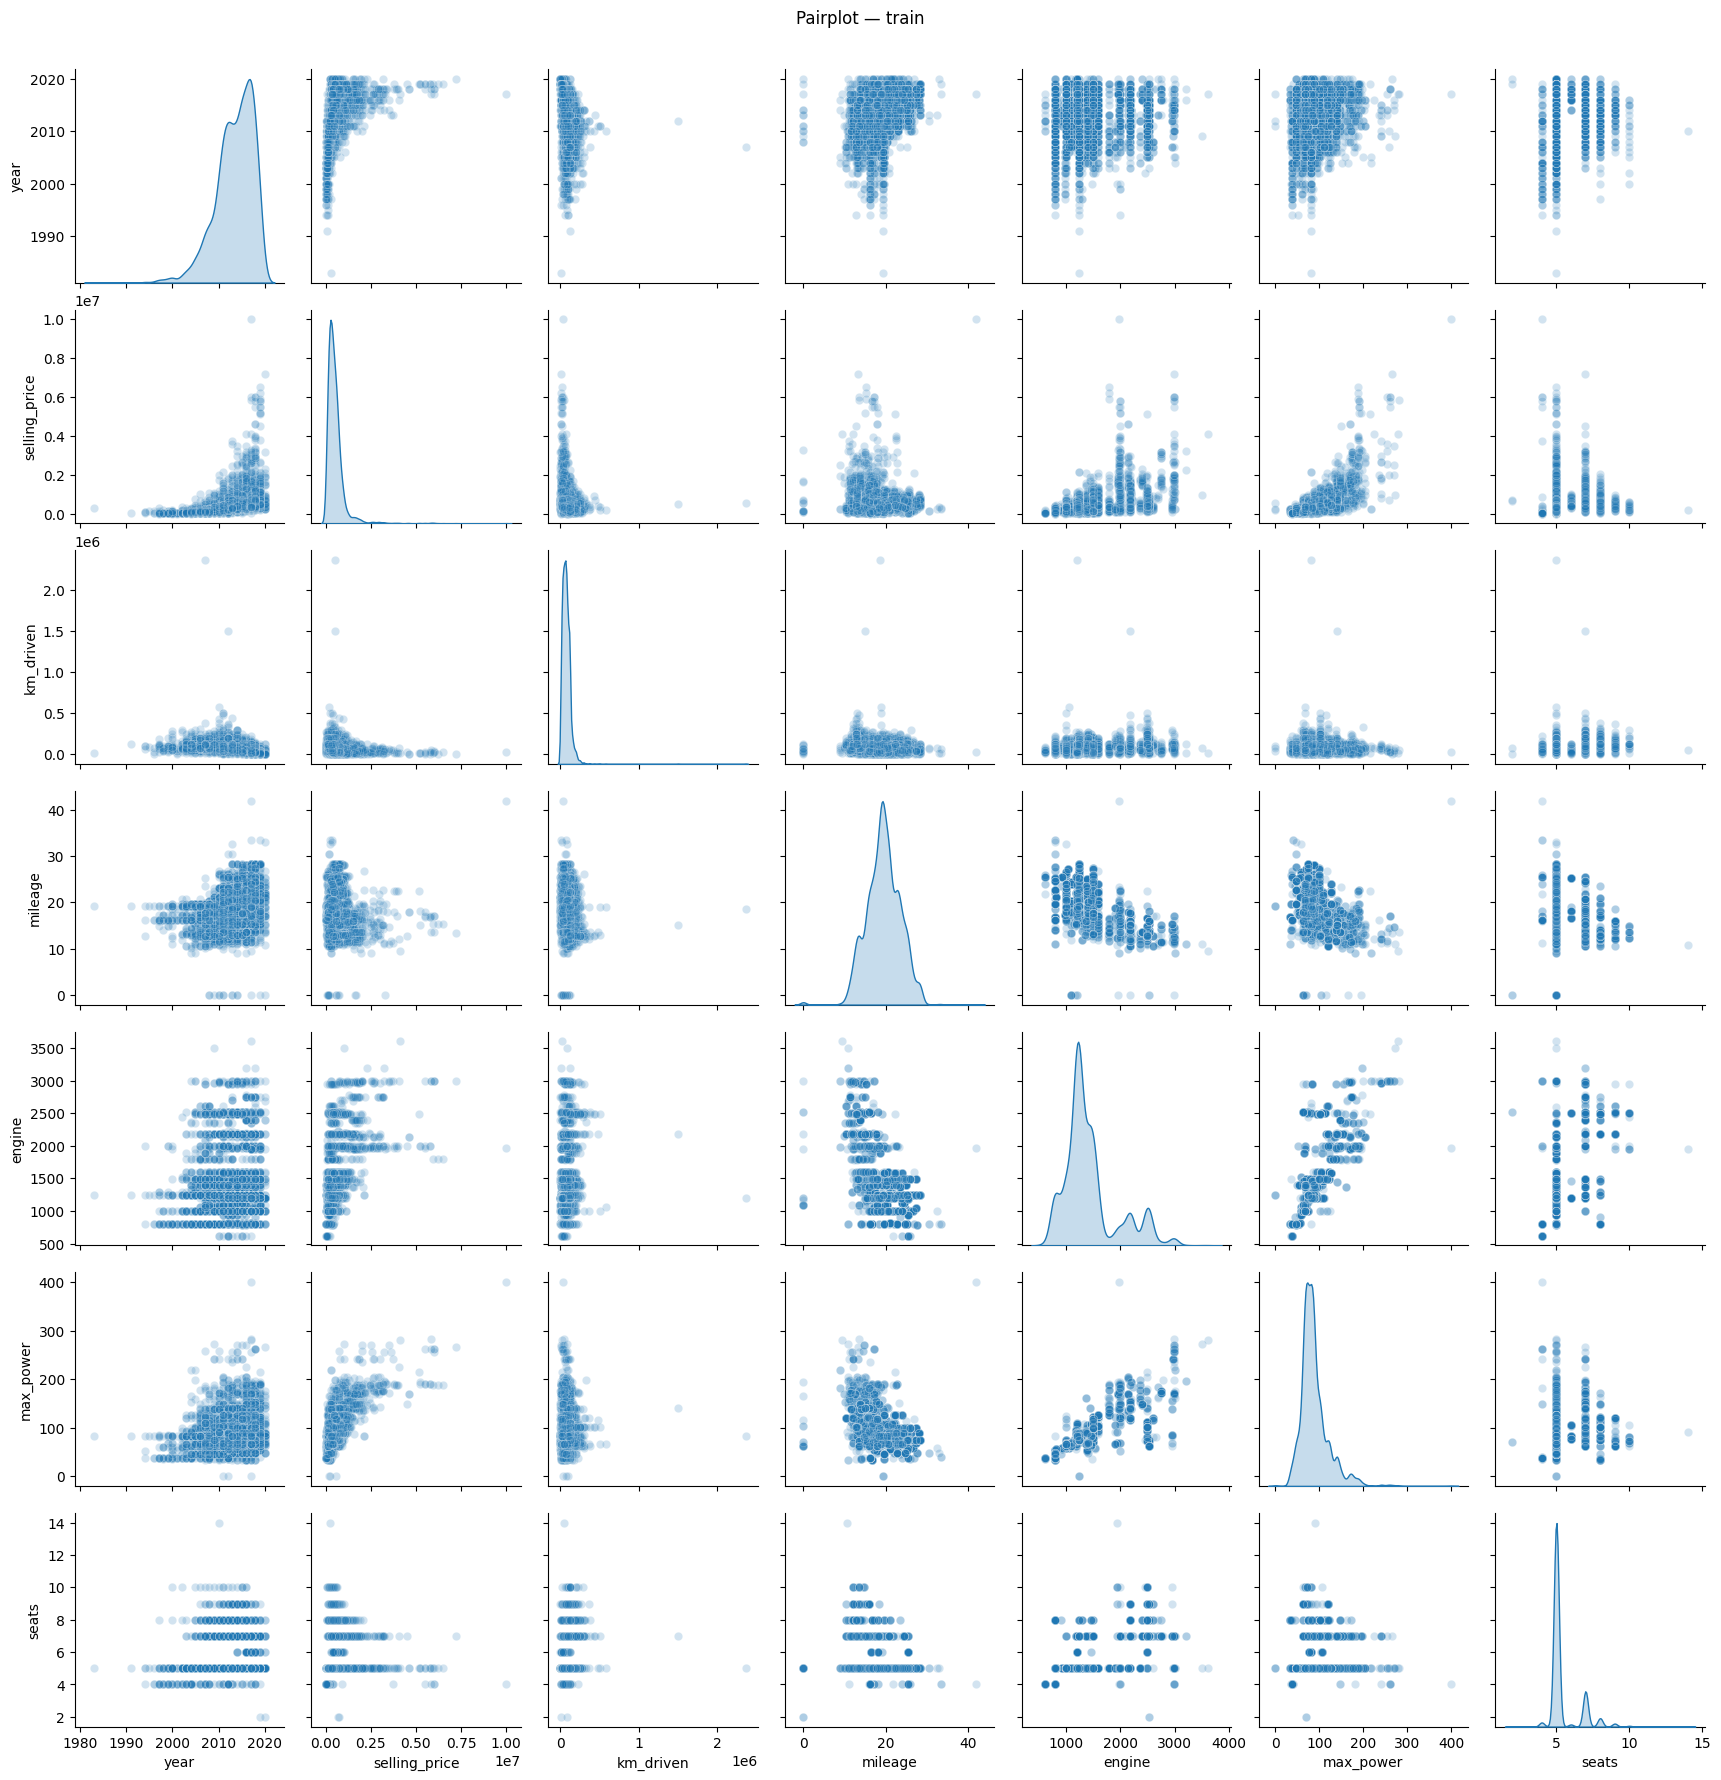

In [44]:
sns.pairplot(df_train[num_cols], diag_kind="kde", plot_kws={"alpha":0.2})
plt.suptitle("Pairplot — train", y=1.02)
plt.show()

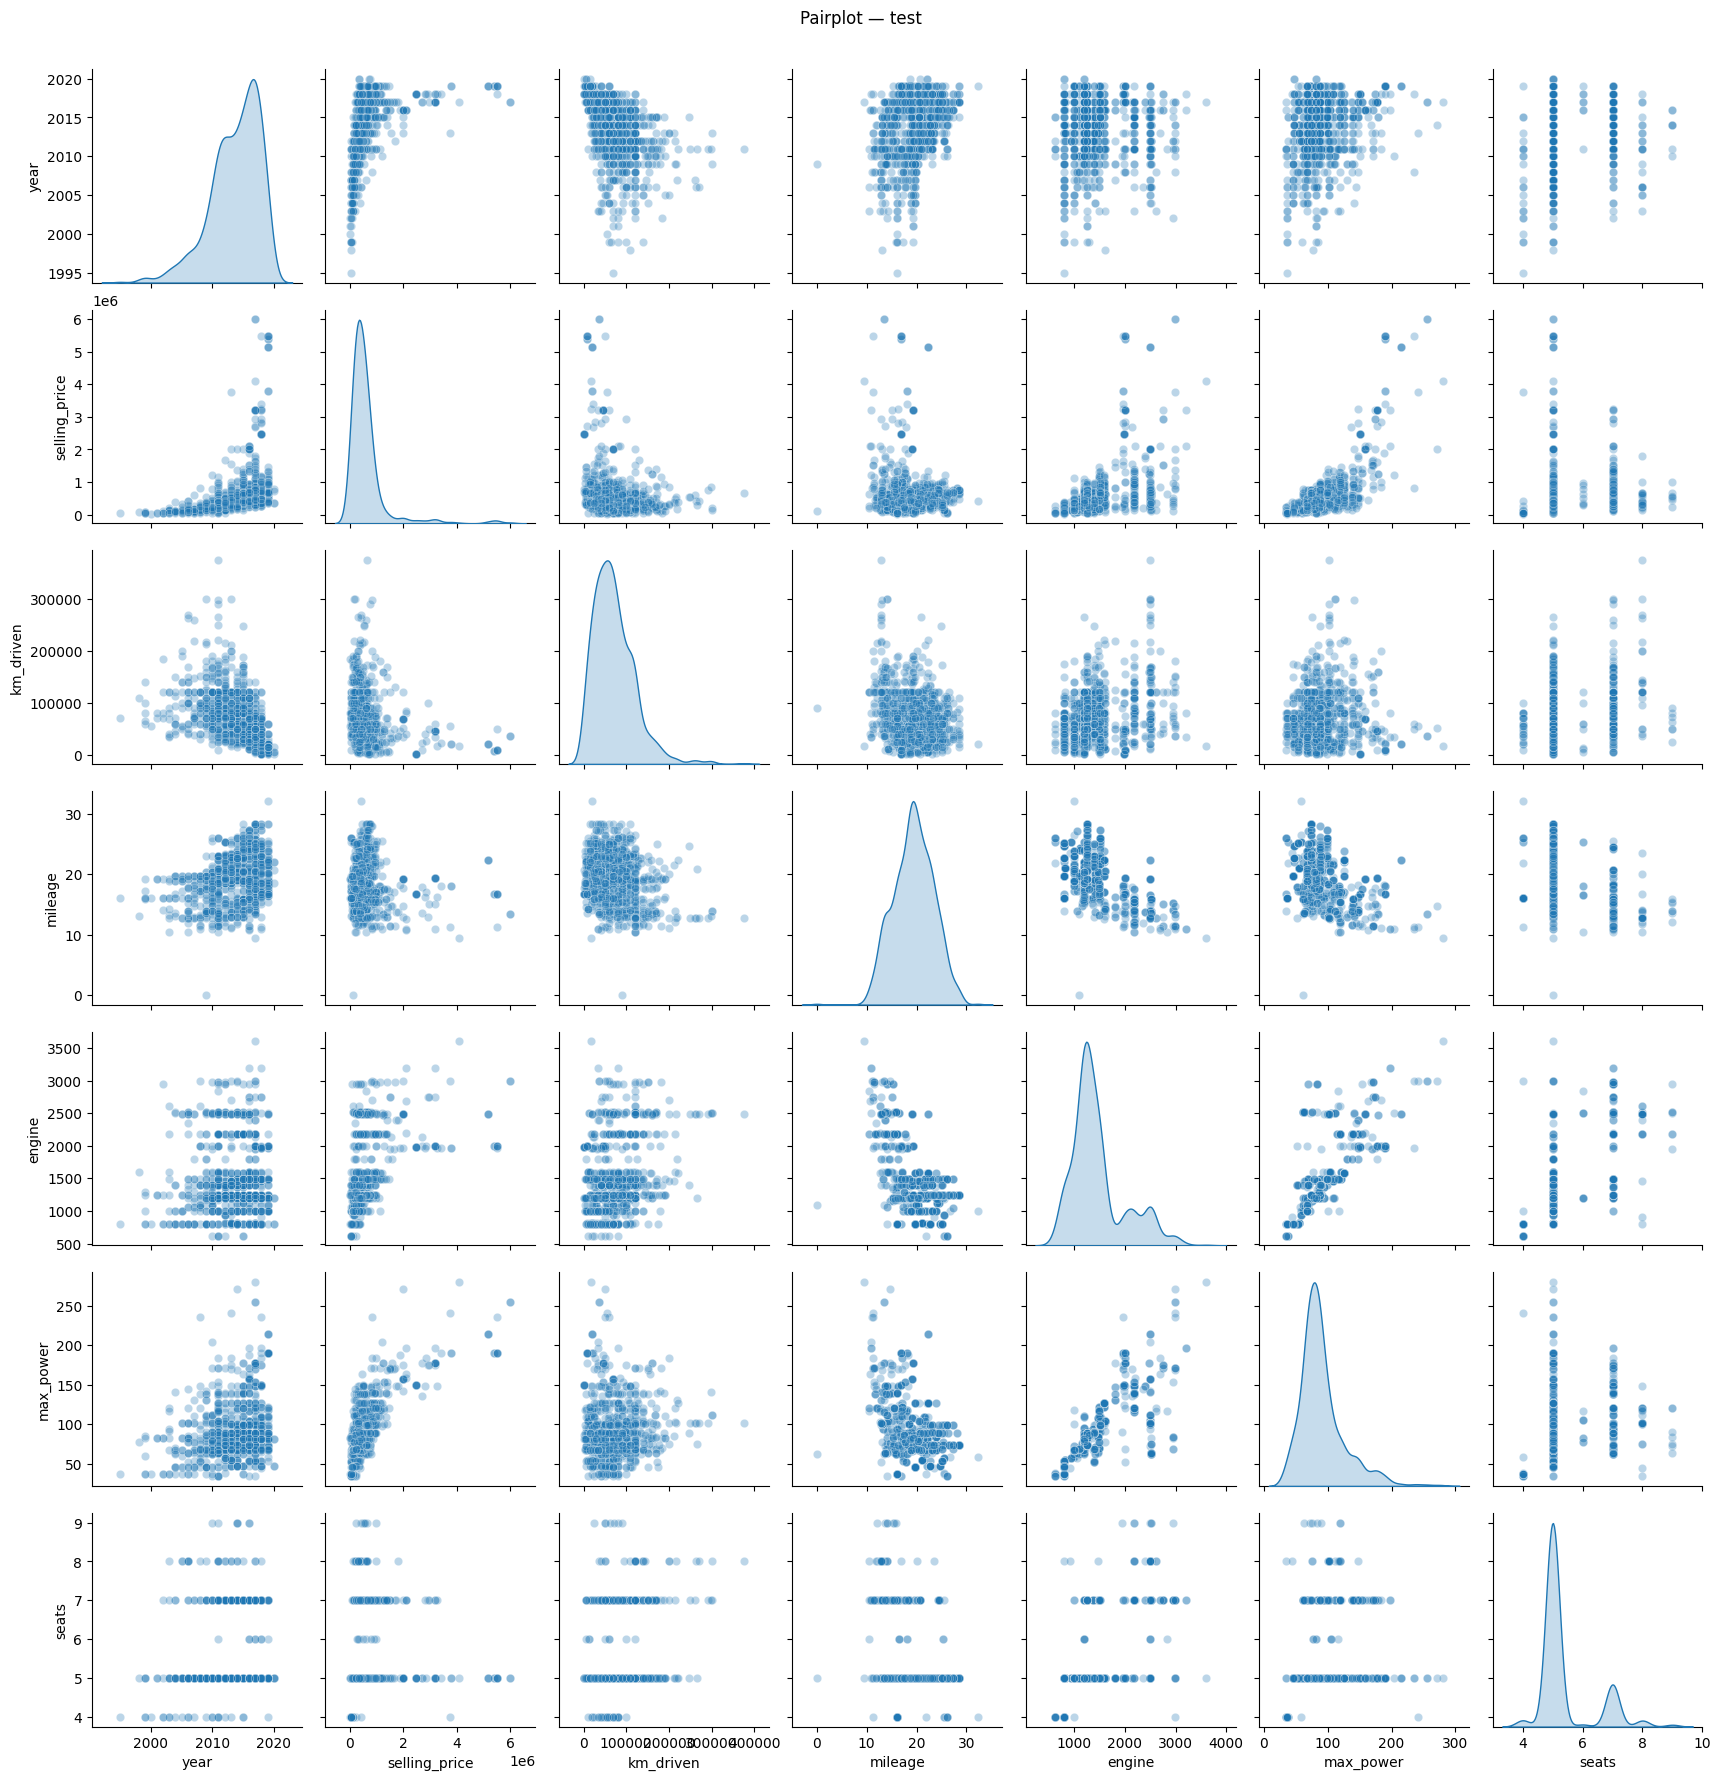

In [45]:
sns.pairplot(df_test[num_cols], diag_kind="kde", plot_kws={"alpha":0.3})
plt.suptitle("Pairplot — test", y=1.02)
plt.show()

> **Выводы:**  
> 1. *Можно ли предположить связь признаков с целевой переменной?*  
>       - Да:
>           - `year`: Более новые автомобили стоят дороже.
>           - `km_driven`: Обратная зависимость — при большем пробеге более низкая цена.
>           - `mileage`: Связь слабее, но можно увидеть, что автомобили с высоким пробегом чаще дешевле.
>           - `engine`: Чем больше объём двигателя, тем выше цена.
>           - `max_power`: Похожая зависимость, что и у `engine`
>
> 2. *Можно ли предположить корреляции между признаками?*
>       - Да, несколько сильных корреляций видны прямо на графике:
>           - `engine` и `max_power`: Чем больше двигатель, тем выше мощность.
>           - `year` и `km_driven`: Новые машины имеют меньше пробег.
>
> 3. *Похожими ли оказались совокупности при разделении на трейн и тест?*
>       - Да:
>           - У test'а выполняются такие же корреляционные взаимосвязи (описанные выше).
>           - Наборы данных выглядят однородными.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из библиотеки seaborn)


In [48]:
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.342172  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104458  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182245  0.229766   
mileage        0.342172      -0.104458  -0.182245  1.000000 -0.572677   
engine         0.002819       0.447672   0.229766 -0.572677  1.000000   
max_power      0.156648       0.692754   0.024630 -0.373271  0.681082   
seats          0.041178       0.149953   0.192328 -0.450810  0.652172   

               max_power     seats  
year            0.156648  0.041178  
selling_price   0.692754  0.149953  
km_driven       0.024630  0.192328  
mileage        -0.373271 -0.450810  
engine          0.681082  0.652172  
max_power       1.000000  0.244060  
seats           0.244060  1.000000

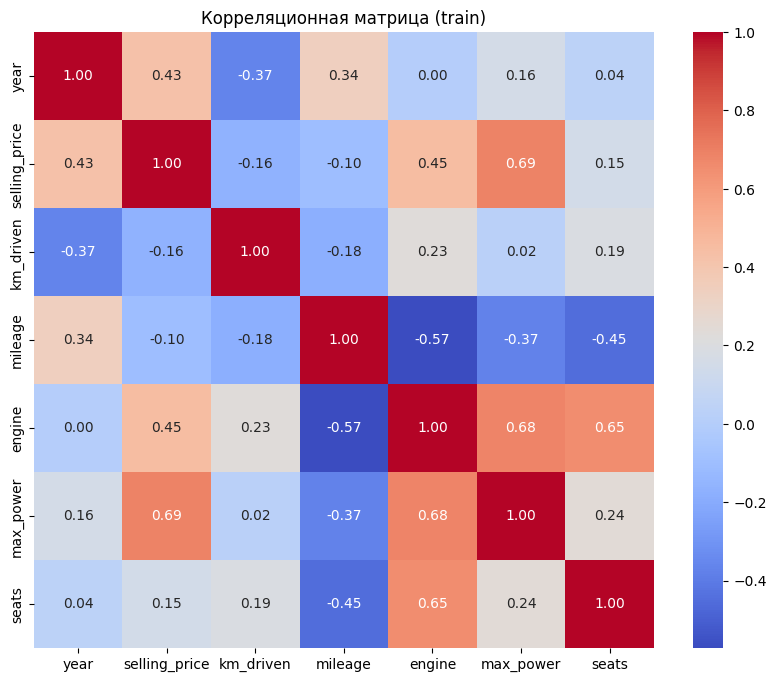

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица (train)")
plt.show()

- [x] Ответьте на вопросы:
   - Какие 2 признака наименее скоррелированы между собой?
   - Между какими наблюдается довольно сильная положительная линейная зависимость?
   - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

> **Ответы:**  
> 1. *Какие 2 признака наименее скоррелированы между собой?*
>       - Наименьшая корреляция у пары `engine`-`year`.
> 2. *Между какими наблюдается довольно сильная положительная линейная зависимость?*
>       - `engine`-`max_power`
>       - `max_power`-`selling_price`
>       - `engine`-`seats`
> 3. *Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?*
>       - Да, у пары `year`-`km_driven` отрицательная корелляция — старые машины в среднем имеют больший пробег.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

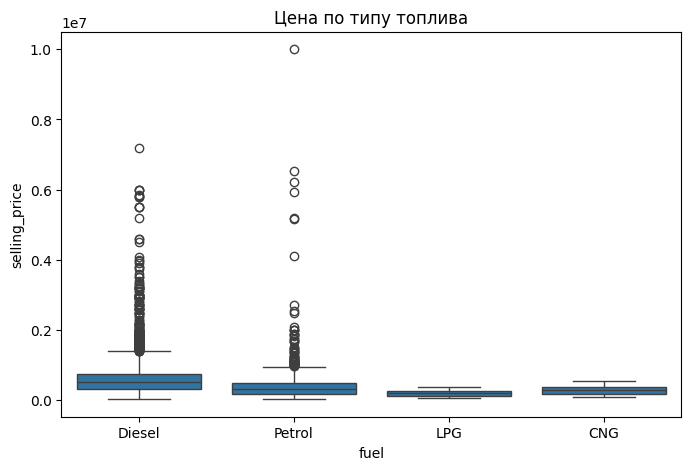

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x="fuel", y="selling_price")
plt.title("Цена по типу топлива")
plt.show()

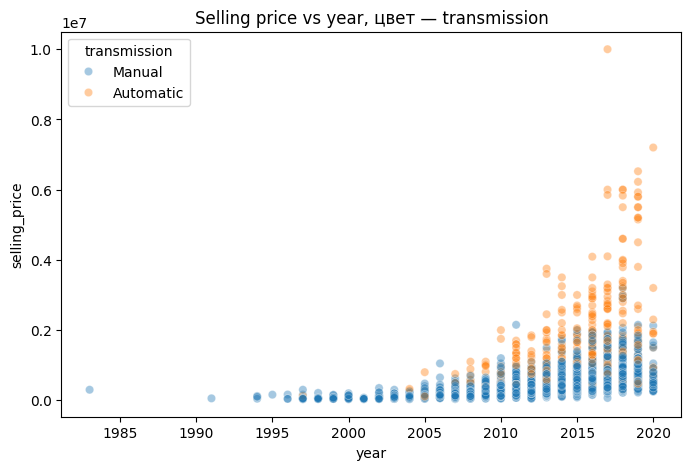

In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_train, x="year", y="selling_price", hue="transmission", alpha=0.4)
plt.title("Selling price vs year, цвет — transmission")
plt.show()

> **Выводы:**  
> 1. Видно, что цена автомобиля заметно зависит от типа топлива.  
> Diesel-автомобили оказываются в среднем дороже бензиновых (Petrol) — их медианная цена выше, и разброс значений шире.  
> 2. Заметно, что автомобили с автоматическими коробками дороже ручных. 

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [53]:
train_numeric = df_train.copy()
test_numeric = df_test.copy()

train_numeric = train_numeric.drop(columns=cat_cols)
test_numeric = test_numeric.drop(columns=cat_cols)

X_train = train_numeric.drop(columns=["selling_price"])
y_train = train_numeric["selling_price"]

X_test = test_numeric.drop(columns=["selling_price"])
y_test = test_numeric["selling_price"]

In [55]:
# опишите выбранные вещественные признаки
X_train.columns.tolist()

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [62]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"r2_train = {r2_train:.4f}, r2_test = {r2_test:.4f}, \nmse_train = {mse_train:.2f}, mse_test = {mse_test:.2f}")

r2_train = 0.5923, r2_test = 0.5941, 
mse_train = 116873067751.52, mse_test = 233297548204.61


> **Вывод:**  
> 
> Модель не переобучена, но показывает среднее качество. Лучшей метрикой, мне кажется, лучше использовать $R^2$. Т.к. в задачах цены $MSE$ всегда большое...

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [64]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [65]:
linreg_scaled = LinearRegression()
linreg_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = linreg_scaled.predict(X_train_scaled)
y_test_pred_scaled = linreg_scaled.predict(X_test_scaled)

r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test, y_test_pred_scaled)

mse_train_scaled = MSE(y_train, y_train_pred_scaled)
mse_test_scaled = MSE(y_test, y_test_pred_scaled)

print(f"r2_train = {r2_train_scaled:.4f}, r2_test = {r2_test_scaled:.4f}, \nmse_train = {mse_train_scaled:.2f}, mse_test = {mse_test_scaled:.2f}")

r2_train = 0.5923, r2_test = 0.5941, 
mse_train = 116873067751.52, mse_test = 233297548204.60


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [66]:
coefs = linreg_scaled.coef_

feature_names = X_train.columns

coef_table = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
})

coef_table.sort_values("abs_coef", ascending=False)

feature           coef       abs_coef
4  max_power  322779.703236  322779.703236
0       year  152843.262358  152843.262358
3     engine   61176.857150   61176.857150
1  km_driven  -44148.047511   44148.047511
2    mileage   28781.086595   28781.086595
5      seats  -23220.570226   23220.570226

> **Ответ:**  
> Наибольший коэффициент по модулю имеет признак `max_power`.  

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [68]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f"r2_train = {r2_train_lasso:.4f}, r2_test = {r2_test_lasso:.4f}, \nmse_train = {mse_train_lasso:.2f}, mse_test = {mse_test_lasso:.2f}")

r2_train = 0.5923, r2_test = 0.5941, 
mse_train = 116873067761.64, mse_test = 233298219170.76


In [69]:
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)
lasso_coefs

year         152843.083853
km_driven    -44146.918538
mileage       28779.204085
engine        61172.025780
max_power    322780.586197
seats        -23217.693273
dtype: float64

> **Ответы и предположения:**  
> 1. Результаты почти полностью совпадают с обычной линейной регрессией. Это, возможно, из-за того что L1-регуляризация слабее помогает при малом количестве признаков.  
> 2. Lasso не занулила ни один коэффициент, потому что все числовые признаки вносят полезную информацию в модель. Шумных фичей там нет.  

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
   - Сколько грид-сёрчу пришлось обучать моделей?
   - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [72]:
param_grid = {"alpha": np.logspace(-3, 2, 20)}

lasso = Lasso(max_iter=6000)

grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring="r2"
)

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=6000),
             param_grid={'alpha': array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02])},
             scoring='r2')

In [73]:
print("Лучшие параметры:")
grid.best_params_

Лучшие параметры:


{'alpha': np.float64(100.0)}

In [75]:
print(f"Лучший скор: {grid.best_score_}")

Лучший скор: 0.5682328004899914


In [76]:
best_lasso = grid.best_estimator_
best_lasso_coefs = pd.Series(best_lasso.coef_, index=X_train.columns)
best_lasso_coefs

year         152819.552972
km_driven    -44037.832071
mileage       28601.040620
engine        60701.694505
max_power    322866.990926
seats        -22933.373485
dtype: float64

> **Ответы:**
> 1. Отработал быстро (1 сек.), обучил 200 моделей. 
> 2. При подборе гиперпараметров лучшим оказался коэффициент регуляризации $\alpha = 100.0$. При этом ни один из весов модели не был занулён.

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
   - Сколько грид-сёрчу пришлось обучать моделей?
   - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [80]:
param_grid = {
    "alpha": np.logspace(-3, 2, 10),
    "l1_ratio": np.linspace(0.1, 1.0, 10)
}

elastic = ElasticNet(max_iter=6000)

grid_elastic_net = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid,
    cv=10,
    scoring="r2"
)

grid_elastic_net.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=6000),
             param_grid={'alpha': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

In [81]:
print("Лучшие параметры:")
grid_elastic_net.best_params_

Лучшие параметры:


{'alpha': np.float64(0.1668100537200059), 'l1_ratio': np.float64(0.1)}

In [83]:
print(f"Лучший скор: {grid_elastic_net.best_score_}")

Лучший скор: 0.5767721643375896


In [84]:
best_elastic_net = grid_elastic_net.best_estimator_
pd.Series(best_elastic_net.coef_, index=X_train.columns)

year         142319.458861
km_driven    -46196.556147
mileage       20343.476421
engine        82475.063619
max_power    266717.208240
seats        -22957.831320
dtype: float64

In [110]:
y_train_pred_elastic_net = best_elastic_net.predict(X_train_scaled)
y_test_pred_elastic_net = best_elastic_net.predict(X_test_scaled)

r2_train_elastic_net = r2_score(y_train, y_train_pred_elastic_net)
r2_test_elastic_net = r2_score(y_test, y_test_pred_elastic_net)

mse_train_elastic_net = MSE(y_train, y_train_pred_elastic_net)
mse_test_elastic_net = MSE(y_test, y_test_pred_elastic_net)

print(f"r2_train = {r2_train_elastic_net:.4f}, r2_test = {r2_test_elastic_net:.4f}, \nmse_train = {mse_train_elastic_net:.2f}, mse_test = {mse_test_elastic_net:.2f}")

r2_train = 0.5845, r2_test = 0.5615, 
mse_train = 119091533308.34, mse_test = 252063513752.00


> **Ответ:**  
> 1. 5 секунд, обучил 1000 моделей.  

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец `name`

In [86]:
df_train = df_train.drop(columns=["name"])
df_test = df_test.drop(columns=["name"])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [90]:
X_train_cat = df_train.drop(columns=["selling_price"])
X_test_cat = df_test.drop(columns=["selling_price"])

In [91]:
assert X_train_cat.shape == (5840, 10)

In [92]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [103]:
cat_cols = ["fuel", "seller_type", "transmission", "owner", "seats"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
ohe.fit(X_train_cat[cat_cols])
X_train_ohe = ohe.transform(X_train_cat[cat_cols])
X_test_ohe = ohe.transform(X_test_cat[cat_cols])

ohe_feature_names = ohe.get_feature_names_out(cat_cols)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=X_train_cat.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=X_test_cat.index)

In [104]:
num_cols = [col for col in X_train_cat.columns if col not in cat_cols]

X_train_final = pd.concat([X_train_cat[num_cols], X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_cat[num_cols], X_test_ohe], axis=1)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [107]:
scaler_ridge = StandardScaler()
scaler_ridge.fit(X_train_final)

X_train_scaled_ridge = scaler_ridge.transform(X_train_final)
X_test_scaled_ridge = scaler_ridge.transform(X_test_final)

param_grid_ridge = {"alpha": np.logspace(-3, 3, 20)}

ridge = Ridge(max_iter=6000)

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=10,
    scoring="r2"
)

grid_ridge.fit(X_train_scaled_ridge, y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=6000),
             param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='r2')

In [108]:
best_ridge = grid_ridge.best_estimator_

y_train_pred_ridge = best_ridge.predict(X_train_scaled_ridge)
y_test_pred_ridge = best_ridge.predict(X_test_scaled_ridge)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

mse_train_ridge = MSE(y_train, y_train_pred_ridge)
mse_test_ridge = MSE(y_test, y_test_pred_ridge)

print(f"r2_train = {r2_train_ridge:.4f}, r2_test = {r2_test_ridge:.4f}, \nmse_train = {mse_train_ridge:.2f}, mse_test = {mse_test_ridge:.2f}")

r2_train = 0.6644, r2_test = 0.6150, 
mse_train = 96205581970.16, mse_test = 221299636739.95


> **Ответ:**  
> 1. Да, качество по обеим метрикам улучшилось, т.к. как мы добавили информативные признаки.  

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [116]:
def business_metric(y_true, y_pred):
    relative_error = np.abs(y_pred - y_true) / y_true
    return (relative_error <= 0.10).mean()

print(f"Business metric — LR: {business_metric(y_test, y_test_pred)}")
print(f"Business metric — Stand. LR: {business_metric(y_test, y_test_pred_scaled)}")
print(f"Business metric — Lasso: {business_metric(y_test, y_test_pred_lasso)}")
print(f"Business metric — ElasticNet: {business_metric(y_test, y_test_pred_elastic_net)}")
print(f"Business metric — Ridge: {business_metric(y_test, y_test_pred_ridge)}")

Business metric — LR: 0.227
Business metric — Stand. LR: 0.227
Business metric — Lasso: 0.227
Business metric — ElasticNet: 0.247
Business metric — Ridge: 0.252


> **Ответ:**  
> 1. Самая лучшая модель — Ridge-регрессия. Это можно объяснить тем, что Ridge хорошо справляется с мультиколлинеарностью, возникающей после OHE, и при этом использует весь набор доступных признаков, не зануляя важные веса (как Lasso).  

$\delta$